### Social Media Data for DSBA

# Context:


* An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers.

* This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product.

* Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]


# Objective:
* To harness the available data of existing and potential customers and improve marketing expenditure, thus avoiding high costs

* To Predict social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product

# Key Questions:
1. What key variables are important in identifying potential purchasing customers?
2. What are the different characteristics of the Customers who bought the packages ?
3. What's the important performance metric for the model and how can it be improved?

# Dataset Attributes:

## Customer details:



1. UserID: Unique ID of user
2. Buy_ticket: Buy ticket in next month
3. Yearly_avg_view_on_travel_page: Average yearly views on any travel related page by user
4. preferred_device: Through which device user preferred to do login
5. total_likes_on_outstation_checkin_given : Total number of likes given by a user on out of station checkings in last year 
6. yearly_avg_Outstation_checkins : Average number of out of station check-in done by user 
7. member_in_family :Total number of relationship mentioned by user in the account
8. preferred_location_type : Preferred type of the location for travelling of user 
9. Yearly_avg_comment_on_travel_page : Average yearly comments on any travel related page by user
10. total_likes_on_outofstation_checkin_received : Total number of likes received by a user on out of station checkings in last year
11. week_since_last_outstation_checkin : Number of weeks since last out of station check-in update by user
12. following_company_page : Weather the customer is following company page (Yes or No)
13. montly_avg_comment_on_company_page :Average monthly comments on company page by user
14. working_flag : Weather the customer is working or not
15. travelling_network_rating : Does user have close friends who also like travelling. 1 is highs and 4 is lowest
16. Adult_flag: Weather the customer is adult or not
17. Daily_Avg_mins_spend_on_traveling_page: Average time spend on the company page by user on daily basis

                              

 ## Importing Necessary Libraries

 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

## Load and Explore the Data

In [4]:
df = pd.read_csv("Social Media Data for DSBA.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 11760 rows and 17 columns.


In [5]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [7]:
df.isnull().any()

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                   True
preferred_device                                 True
total_likes_on_outstation_checkin_given          True
yearly_avg_Outstation_checkins                   True
member_in_family                                False
preferred_location_type                          True
Yearly_avg_comment_on_travel_page                True
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                           True
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
dtype: bool

In [8]:
df.isna().any()

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                   True
preferred_device                                 True
total_likes_on_outstation_checkin_given          True
yearly_avg_Outstation_checkins                   True
member_in_family                                False
preferred_location_type                          True
Yearly_avg_comment_on_travel_page                True
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                           True
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
dtype: bool

In [9]:
df.isna().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [10]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [11]:
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [12]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

## Data Pre-Processing:


## Fixing Datatypes

In [13]:
df.drop(['UserID'],axis=1,inplace=True) #dropping the unwanted columns

In [14]:
cat_cols = ['Taken_product','preferred_device','yearly_avg_Outstation_checkins','member_in_family','preferred_location_type','following_company_page','working_flag']
df[cat_cols] = df[cat_cols].astype('category')

cols = df.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 11760 non-null  category
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64 
 2   preferred_device                              11707 non-null  category
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64 
 4   yearly_avg_Outstation_checkins                11685 non-null  category
 5   member_in_family                              11760 non-null  category
 6   preferred_location_type                       11729 non-null  category
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64   
 9   week_since_last_outstation_checkin            1176

* The datatypes have been fixed and the memory reduced.

## Missing Value Treatment:

In [15]:
df.isna().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [16]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Yearly_avg_view_on_travel_page')
missing_numerical.remove('total_likes_on_outstation_checkin_given')
missing_numerical.remove('Yearly_avg_comment_on_travel_page')
missing_numerical

['total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [17]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [18]:
#we will replace the missing values with median 
df["Yearly_avg_view_on_travel_page"]= df["Yearly_avg_view_on_travel_page"].transform(lambda x: x.fillna(x.median()))
df["total_likes_on_outstation_checkin_given"]= df["total_likes_on_outstation_checkin_given"].transform(lambda x: x.fillna(x.median()))
df["Yearly_avg_comment_on_travel_page"]= df["Yearly_avg_comment_on_travel_page"].transform(lambda x: x.fillna(x.median()))


### Summary of Numerical Columns

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11760.0,280.345153,66.511330,35.0,233.00,271.0,322.00,464.0
total_likes_on_outstation_checkin_given,11760.0,28167.420748,14150.080463,3570.0,16697.25,28076.0,40115.25,252430.0
Yearly_avg_comment_on_travel_page,11760.0,74.793707,23.815280,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.793878,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0


In [20]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')


No     9864
Yes    1896
Name: Taken_product, dtype: int64
--------------------------------------------------


Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Others                2
Other                 2
Name: preferred_device, dtype: int64
--------------------------------------------------


1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64
--------------------------------------------------


3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dty

**Observations:**

* In the preferred_device column, there are multiple devices that falls in category of Mobile but given separately, and we required only two categories i.e. Laptops and Mobile.
* In the member_in_family column, there is a string value("three") is given, which have to be converted in numerical form.
* Hence we will replace the missing values in the above columns accordingly


In [21]:
#treating missing values in categorical variables

df['preferred_device'] = df['preferred_device'].fillna('Mobile')
df["Yearly_avg_comment_on_travel_page"] = df['Yearly_avg_comment_on_travel_page'].fillna(0)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].fillna('*')
df['following_company_page'] = df['following_company_page'].fillna('1')
df["preferred_location_type"] = df['preferred_location_type'].fillna('Other')
df['preferred_device'] = np.where((df.preferred_device != 'Laptop'),'Mobile',df.preferred_device)
df['member_in_family']= df.member_in_family = df.member_in_family.replace('Three','3') #treating errors
df['yearly_avg_Outstation_checkins']= df.yearly_avg_Outstation_checkins.replace('*','0') #treating error

In [22]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [23]:
df['member_in_family'].unique()

['2', '1', '4', '3', '5', '10']
Categories (6, object): ['2', '1', '4', '3', '5', '10']

In [24]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

* All missing values are treated

### Summary of Categorical Variables

In [25]:
df.describe(include="category").T

,count,unique,top,freq
Taken_product,11760,2,No,9864
yearly_avg_Outstation_checkins,11760,30,1,4543
member_in_family,11760,6,3,4576
preferred_location_type,11760,15,Beach,2424
following_company_page,11760,4,No,8355
working_flag,11760,2,No,9952


**Observations:**
* Taken_product : There is heavy imnbalance in this column where atleast 83% of customers did not purchase any product
* yearly_avg_Outstation_checkins : there is atleast 1 outstation checkin happens
* member_in_family : Most customers have atleast 3 family members.
* preferred_location_type : Most customers prefer Beaches to travel.
* following_company_page : There is also heavy imnbalance in this column where atleast 83% of customers did not follow the company page.
* working_flag: Most customers are not working.


## Exploratory Data Analysis:

### Univariate Analysis - Numerical Columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab593ebf10>,
      dtype=object)

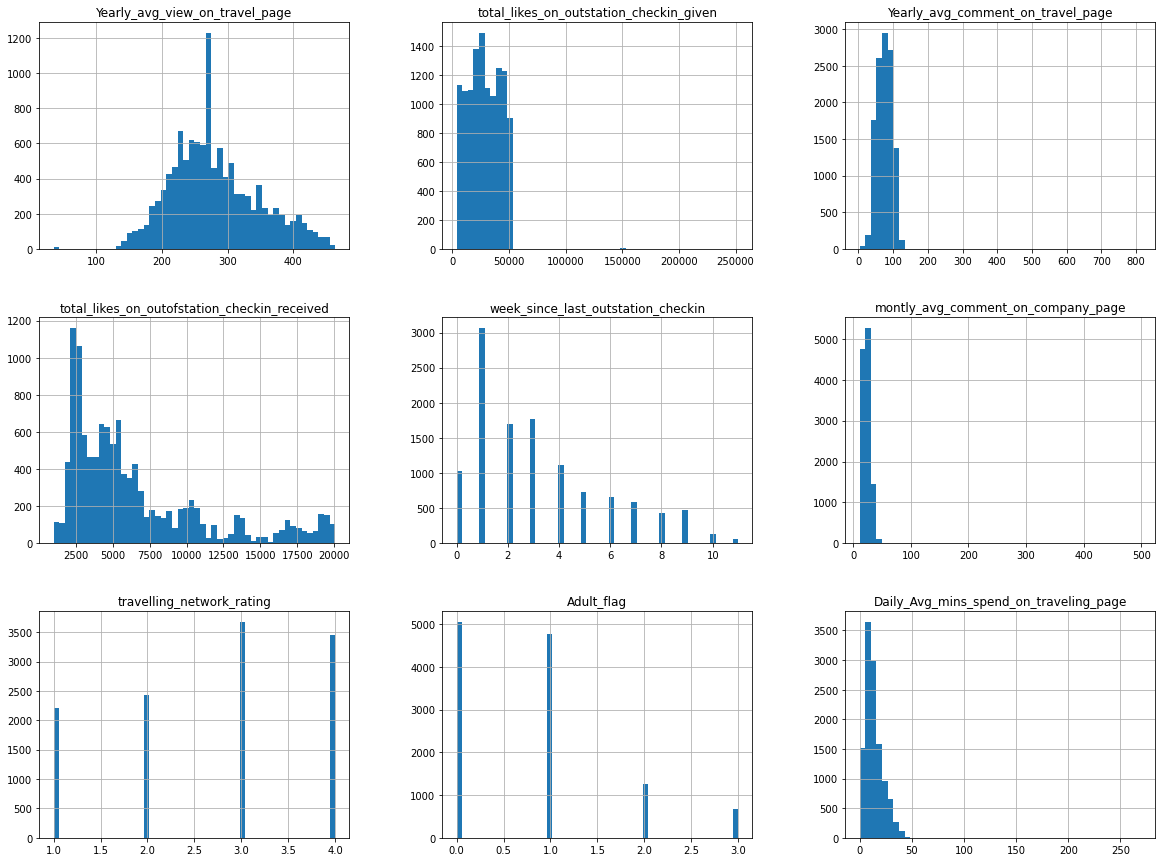

In [26]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
df.hist(bins=50, figsize=(20,15))

**Observations:**

* Yearly_avg_view_on_travel_page is slightly right-skewed. We also see few outliers from 0 to 40. 
* total_likes_on_outstation_checkin_given is left-skewed with few outliers at 150000. 
* Yearly_avg_comment_on_travel_page is heavly right-skwed.
* total_likes_on_outofstation_checkin_received is also right-skewed. However, we see that the majority of likes are between 2000 to 3000.
* montly_avg_comment_on_company_page is left skewed.
* Daily_Avg_mins_spend_on_traveling_page is left skewed.

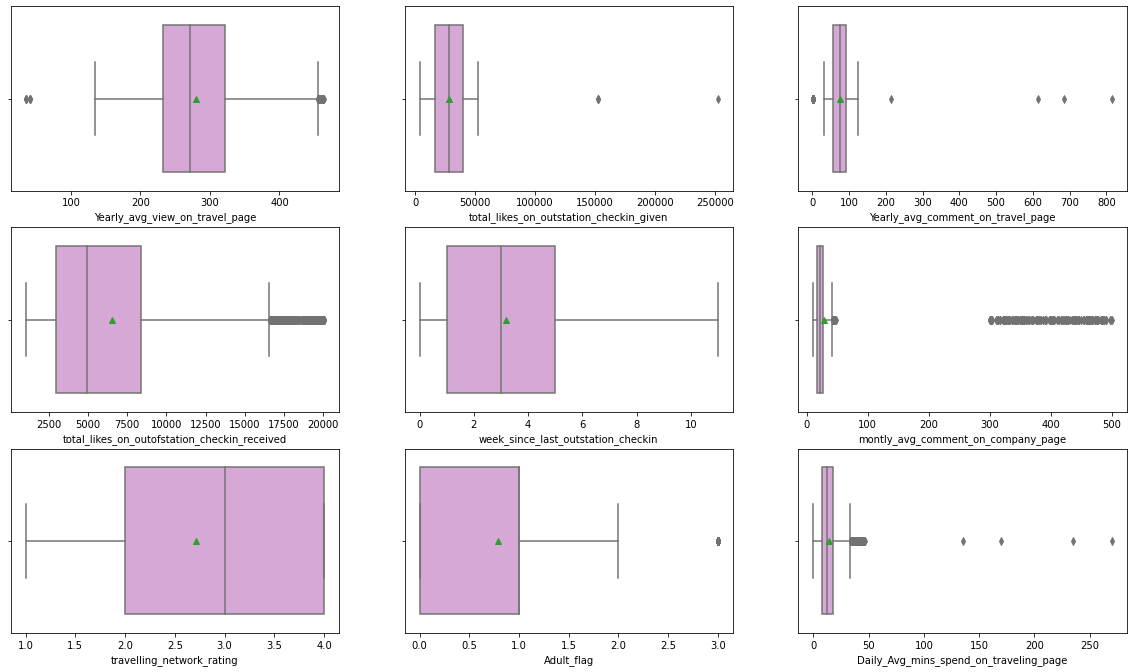

In [27]:
#distribution shown in boxplot
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,40))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color="plum")

plt.show()

### Univariate Analysis - Categorical Columns:

In [28]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

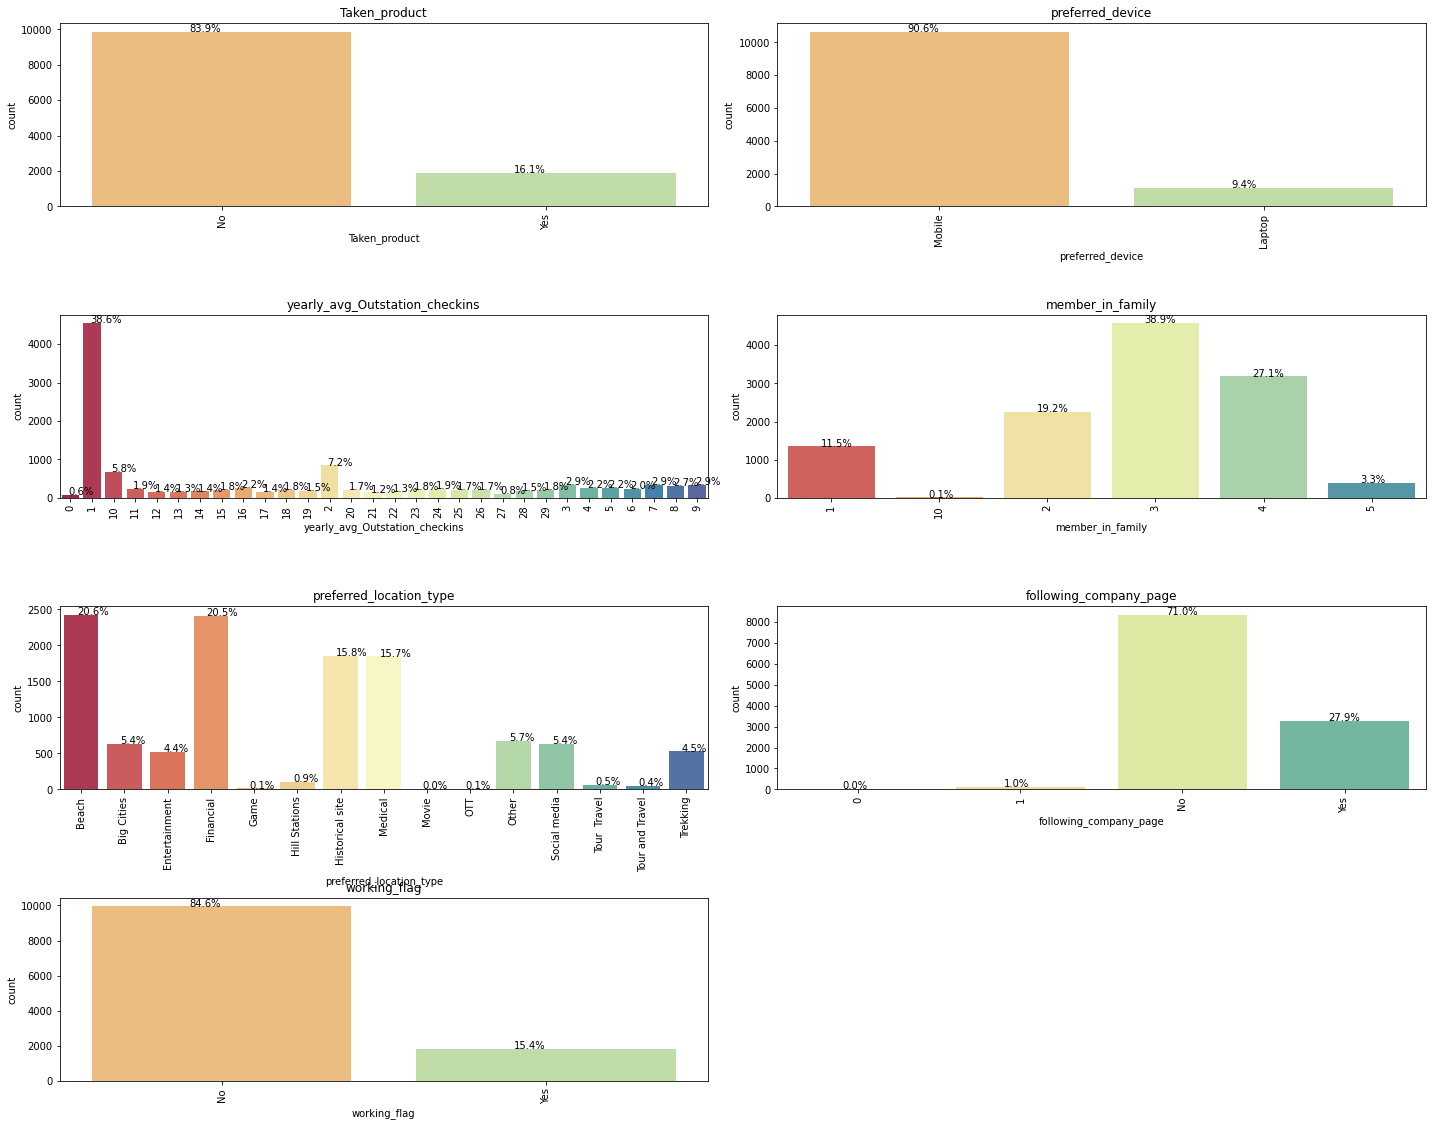

In [29]:
plt.figure(figsize=(20,80))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(20,2,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i])
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 10,color='black') # To annonate
        plt.xticks(rotation=90)
plt.show()

**Observations:**
* Taken_product is the dependent variable. We that only 16.1% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset

* Mobile is the most preffered device by the customers at 90.6%. The plot shows heavy imbalance in the dataset

* 38.9% of customers registered 3 family members and family of 4 is in second place with 27.1%. 

* 84.6% of customers are not Working. 15.5% of customers are working.

* Beach(20.6%) is the most prefered location by the customers and Financial(20.5%) reason is the most prefered reason for taking the product by the customers.

* Only 27.9% of customers following the company page.


## Correlation Matrix

In [30]:
corr_matrix = df.corr()
corr_matrix

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
Yearly_avg_view_on_travel_page,1.000000,0.010511,0.041777,0.484846,0.278970,-0.009498,0.056211,0.036837,0.580170
total_likes_on_outstation_checkin_given,0.010511,1.000000,0.011995,0.012275,0.034838,0.012437,0.010277,0.039411,0.008914
Yearly_avg_comment_on_travel_page,0.041777,0.011995,1.000000,-0.013858,0.059039,0.019161,0.007093,0.043945,0.059993
total_likes_on_outofstation_checkin_received,0.484846,0.012275,-0.013858,1.000000,0.144058,-0.005137,0.025858,0.005418,0.673410
week_since_last_outstation_checkin,0.278970,0.034838,0.059039,0.144058,1.000000,0.031935,0.051027,0.026155,0.249776
montly_avg_comment_on_company_page,-0.009498,0.012437,0.019161,-0.005137,0.031935,1.000000,-0.020538,-0.011738,0.054308
travelling_network_rating,0.056211,0.010277,0.007093,0.025858,0.051027,-0.020538,1.000000,-0.045952,0.019657
Adult_flag,0.036837,0.039411,0.043945,0.005418,0.026155,-0.011738,-0.045952,1.000000,0.007775
Daily_Avg_mins_spend_on_traveling_page,0.580170,0.008914,0.059993,0.673410,0.249776,0.054308,0.019657,0.007775,1.000000


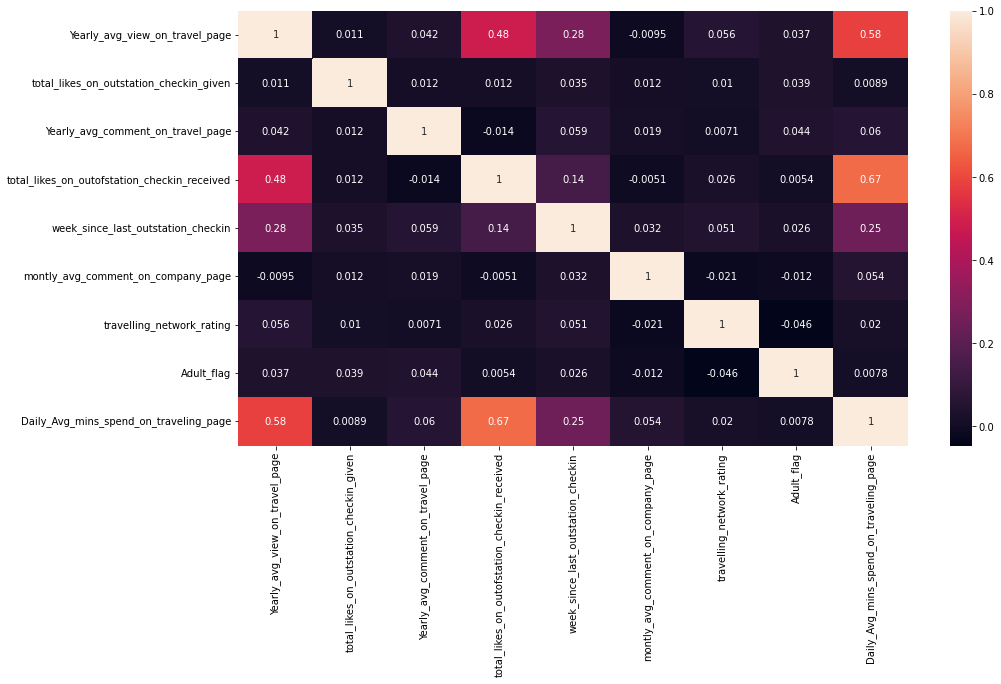

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)



## Bivariate Analysis:
* Let's analyse the dependent variable with all the numerical and categorical features and investigate possible relationships

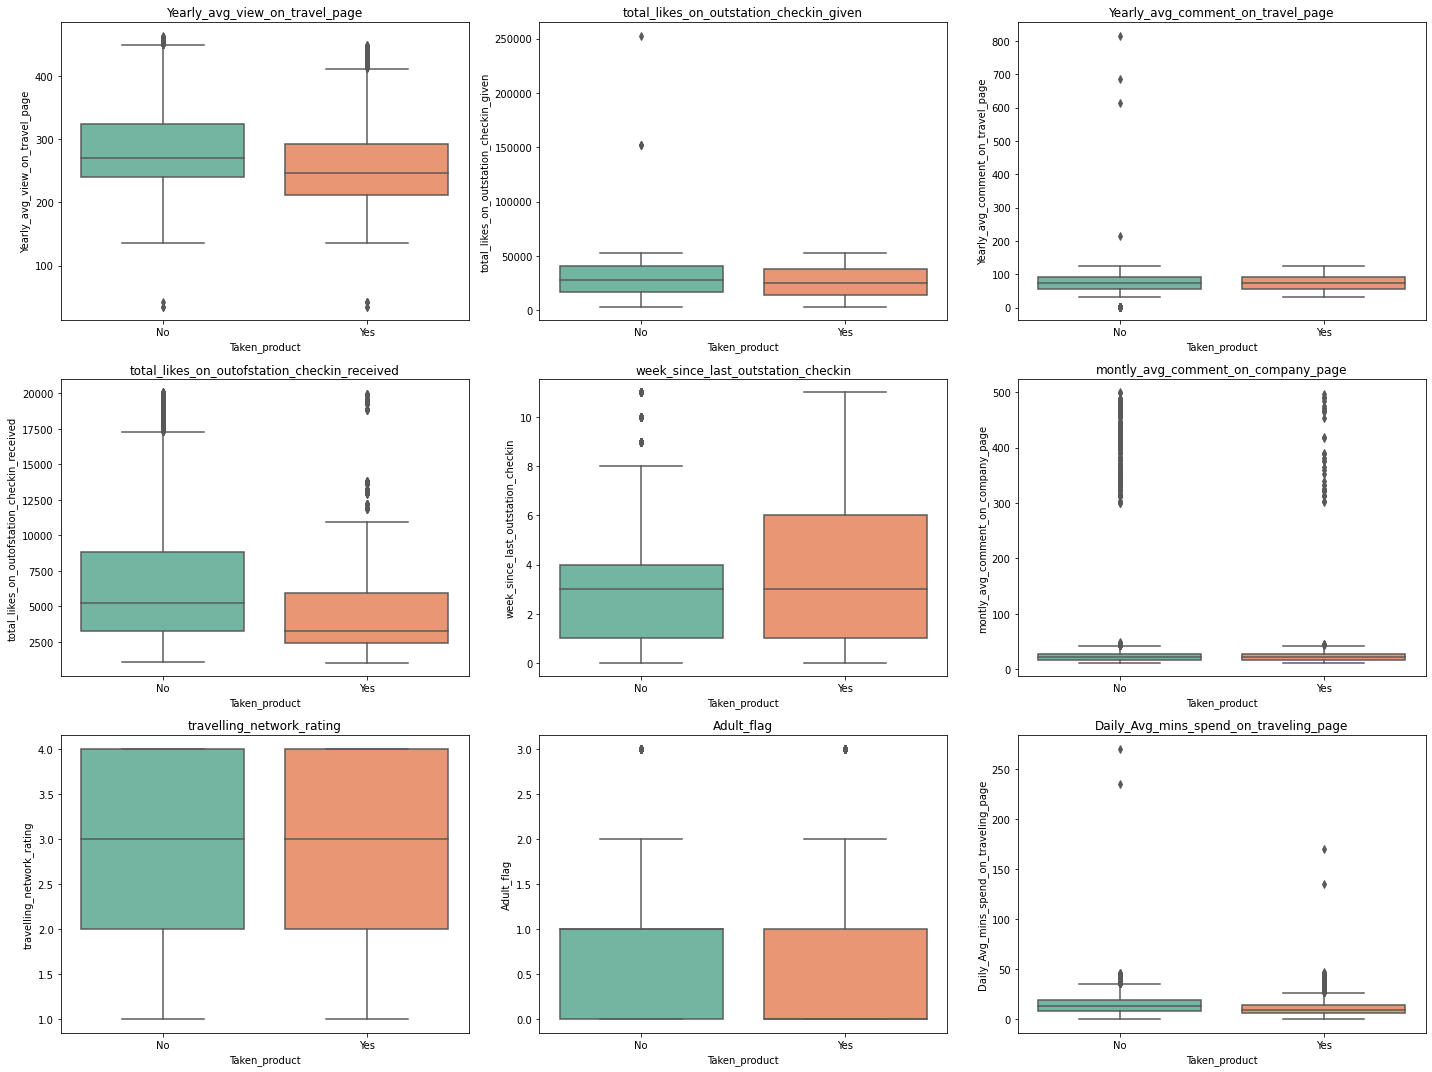

In [32]:
#For all numerical value with Taken_product
plt.figure(figsize=(20,15))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,3,i+1)
                     sns.boxplot(df['Taken_product'],df[variable],palette="Set2")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [33]:
#Stacked plot of categorical variables with Taken_product
def stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [34]:
#Grouped plot of categorical variables with Taken_product
def grouped_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['Taken_product'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Taken_product'],normalize='index')
    tab.plot(kind='bar',stacked=False,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

In [35]:
#Stacked plot of categorical variables with preferred_device
def device_stacked_plot(x):
    sns.set(palette='Set2')
    tab1 = pd.crosstab(x,df['preferred_device'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['preferred_device'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Taken_product       No   Yes    All
member_in_family                   
1                 1102   247   1349
10                  10     1     11
2                 1904   352   2256
3                 3784   792   4576
4                 2720   464   3184
5                  344    40    384
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


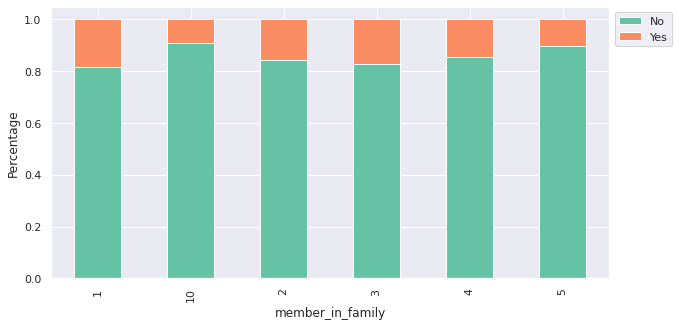

In [36]:
stacked_plot(df.member_in_family)

preferred_device           Laptop  Mobile    All
travelling_network_rating                       
1                             200    2008   2208
2                             196    2228   2424
3                             364    3308   3672
4                             348    3108   3456
All                          1108   10652  11760
------------------------------------------------------------------------------------------------------------------------


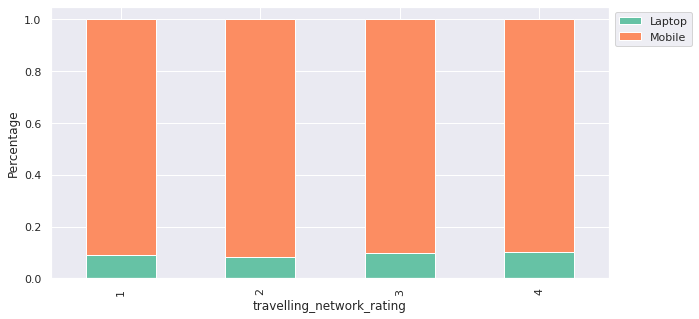

In [37]:
device_stacked_plot(df.travelling_network_rating)

Taken_product       No   Yes    All
preferred_device                   
Laptop             832   276   1108
Mobile            9032  1620  10652
All               9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


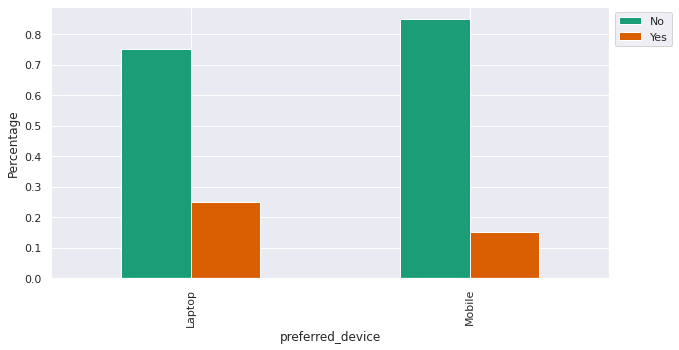

In [38]:
grouped_plot(df.preferred_device)

Taken_product    No   Yes    All
working_flag                    
No             8352  1600   9952
Yes            1512   296   1808
All            9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


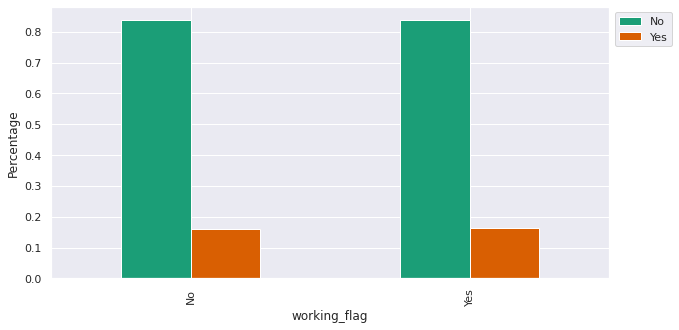

In [39]:
grouped_plot(df.working_flag)

Taken_product              No   Yes    All
preferred_location_type                   
Beach                    2068   356   2424
Big Cities                496   140    636
Entertainment             393   123    516
Financial                2055   354   2409
Game                       11     1     12
Hill Stations              80    28    108
Historical site          1604   252   1856
Medical                  1593   252   1845
Movie                       4     1      5
OTT                         3     4      7
Other                     584    90    674
Social media              494   139    633
Tour  Travel               46    14     60
Tour and Travel            33    14     47
Trekking                  400   128    528
All                      9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


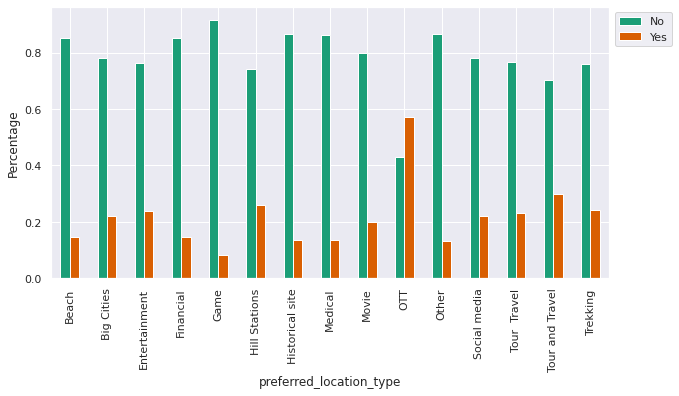

In [40]:
grouped_plot(df.preferred_location_type)

Taken_product                No   Yes    All
travelling_network_rating                   
1                          1752   456   2208
2                          2064   360   2424
3                          3104   568   3672
4                          2944   512   3456
All                        9864  1896  11760
------------------------------------------------------------------------------------------------------------------------


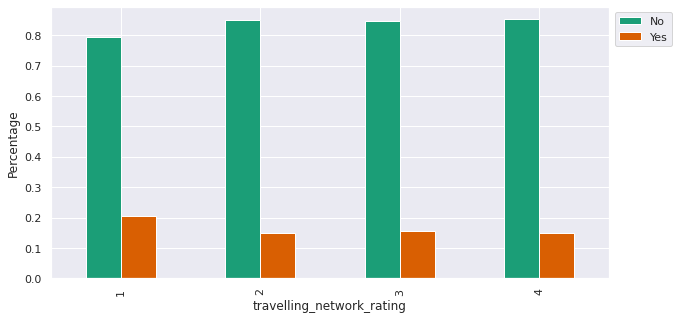

In [41]:
grouped_plot(df.travelling_network_rating)

## Outliers Detection : 

In [42]:
#Let's find the percentage of outliers using IQR

In [43]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [44]:
outlier_num = df.select_dtypes(include=np.number)

In [45]:
outlier_out = ((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100
outlier_out

Yearly_avg_view_on_travel_page                  0.246599
total_likes_on_outstation_checkin_given         0.034014
Yearly_avg_comment_on_travel_page               0.340136
total_likes_on_outofstation_checkin_received    7.789116
week_since_last_outstation_checkin              0.000000
montly_avg_comment_on_company_page              2.057823
travelling_network_rating                       0.000000
Adult_flag                                      5.782313
Daily_Avg_mins_spend_on_traveling_page          2.976190
dtype: float64

* total_likes_on_outofstation_checkin_received, Adult_flag, Daily_Avg_mins_spend_on_traveling_page, and montly_avg_comment_on_company_page have high outliers compared to the other features.

* However, we will not be treating outliers, as we will be building Decision Tree based models and Decision Tree models are not influenced by Outliers.
* Furthermore, in real case scenario, we will encounter similar outliers and that would require the model to investigate if there is any pattern among the customers

### Encoding of columns.

Encoding of target variable.

In [46]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
print("Before encoding:", df['Taken_product'].unique())
# Encode labels in column 'Taken_product'.
df['Taken_product']= label_encoder.fit_transform(df['Taken_product'])
 
print("After encoding:", df['Taken_product'].unique())

Before encoding: ['Yes', 'No']
Categories (2, object): ['Yes', 'No']
After encoding: [1 0]


Encoding 'following_company_page'

In [47]:
print("Before encoding:", df['following_company_page'].unique())
# Encode labels in column 'following_company_page'.
df['following_company_page']= label_encoder.fit_transform(df['following_company_page'])
 
print("After encoding:", df['following_company_page'].unique())

Before encoding: ['Yes', 'No', '1', '0']
Categories (4, object): ['Yes', 'No', '1', '0']
After encoding: [3 2 1 0]


Encoding 'working_flag'

In [48]:
print("Before encoding:", df['working_flag'].unique())
# Encode labels in column 'following_company_page'.
df['working_flag']= label_encoder.fit_transform(df['working_flag'])
 
print("After encoding:", df['working_flag'].unique())

Before encoding: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
After encoding: [0 1]


Encoding 'preferred_location_type'

In [49]:
print("Before encoding:", df['preferred_location_type'].unique())
# Encode labels in column 'following_company_page'.
df['preferred_location_type']= label_encoder.fit_transform(df['preferred_location_type'])
 
print("After encoding:", df['preferred_location_type'].unique())

Before encoding: ['Financial', 'Other', 'Medical', 'Game', 'Social media', ..., 'Beach', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 15
Categories (15, object): ['Financial', 'Other', 'Medical', 'Game', ..., 'Historical site',
                          'Big Cities', 'Trekking', 'Hill Stations']
After encoding: [ 3 10  7  4 11  2 13  8  9 12  0  6  1 14  5]


In [50]:
df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1,2,3,94.0,5993,8,3,11,0,1,0,8
1,0,367.0,Mobile,9765.0,1,1,3,61.0,5130,1,2,23,1,4,1,10
2,1,277.0,Mobile,48055.0,1,2,10,92.0,2090,6,3,15,0,2,0,7
3,0,247.0,Mobile,48720.0,1,4,3,56.0,2909,1,3,11,0,3,0,8
4,0,202.0,Mobile,20685.0,1,1,7,40.0,3468,9,2,12,0,4,1,6


### Dividing the dataset for Mobile and Laptop.

In [51]:
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [52]:
df_mobile = df.loc[df['preferred_device'] == 'Mobile']
df_laptop = df.loc[df['preferred_device'] == 'Laptop']
df_mobile['preferred_device'].unique()

array(['Mobile'], dtype=object)

In [53]:
df_laptop['preferred_device'].unique()

array(['Laptop'], dtype=object)

We can see that we have successfully divided the dataset.

#### Correlation Matrix for Mobile.

In [54]:
df_mobile.corr()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
Taken_product,1.000000,-0.140315,-0.043430,0.032725,-0.013821,-0.148513,0.046916,0.229510,0.002119,0.003648,-0.038472,-0.135546,-0.131623
Yearly_avg_view_on_travel_page,-0.140315,1.000000,0.003746,-0.038103,0.041081,0.486562,0.279545,0.037315,-0.009937,0.005009,0.052839,0.036350,0.574668
total_likes_on_outstation_checkin_given,-0.043430,0.003746,1.000000,0.001154,0.004618,0.014599,0.039155,0.017890,0.012036,-0.000361,0.007092,0.044314,0.007456
preferred_location_type,0.032725,-0.038103,0.001154,1.000000,-0.071119,0.001716,-0.002096,0.010965,0.004380,-0.010660,0.018984,0.006354,0.002321
Yearly_avg_comment_on_travel_page,-0.013821,0.041081,0.004618,-0.071119,1.000000,-0.018486,0.061435,-0.002555,0.019302,-0.003987,0.006263,0.043048,0.056731
total_likes_on_outofstation_checkin_received,-0.148513,0.486562,0.014599,0.001716,-0.018486,1.000000,0.141119,0.012475,-0.006048,-0.023985,0.029387,0.003083,0.671947
week_since_last_outstation_checkin,0.046916,0.279545,0.039155,-0.002096,0.061435,0.141119,1.000000,-0.010722,0.032734,0.000865,0.043508,0.021361,0.245339
following_company_page,0.229510,0.037315,0.017890,0.010965,-0.002555,0.012475,-0.010722,1.000000,0.009158,0.004842,0.049947,0.009416,0.013909
montly_avg_comment_on_company_page,0.002119,-0.009937,0.012036,0.004380,0.019302,-0.006048,0.032734,0.009158,1.000000,0.318044,-0.020759,-0.011973,0.054090
working_flag,0.003648,0.005009,-0.000361,-0.010660,-0.003987,-0.023985,0.000865,0.004842,0.318044,1.000000,-0.030417,0.012817,-0.002194


#### Correlation Matrix for Laptop.

In [55]:
df_laptop.corr()

,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
Taken_product,1.000000,-0.242961,-0.142125,0.039108,0.041578,-0.252337,0.047308,0.262993,-0.014207,-0.010284,-0.120412,-0.149352,-0.252032
Yearly_avg_view_on_travel_page,-0.242961,1.000000,0.083454,-0.065166,0.046342,0.470272,0.276618,0.002703,0.009887,0.006644,0.088335,0.042965,0.644598
total_likes_on_outstation_checkin_given,-0.142125,0.083454,1.000000,0.029842,0.102823,-0.015840,-0.014339,-0.004343,0.070092,0.001505,0.044958,-0.013489,0.024919
preferred_location_type,0.039108,-0.065166,0.029842,1.000000,-0.002728,-0.114884,-0.015379,0.007902,0.025546,0.028797,-0.040152,-0.048356,-0.060384
Yearly_avg_comment_on_travel_page,0.041578,0.046342,0.102823,-0.002728,1.000000,0.051196,0.043860,-0.034019,0.109678,-0.019067,0.007964,0.059635,0.104176
total_likes_on_outofstation_checkin_received,-0.252337,0.470272,-0.015840,-0.114884,0.051196,1.000000,0.171034,-0.005914,0.030667,0.054868,-0.006304,0.027944,0.691151
week_since_last_outstation_checkin,0.047308,0.276618,-0.014339,-0.015379,0.043860,0.171034,1.000000,0.011444,0.025461,-0.106720,0.133169,0.073303,0.299628
following_company_page,0.262993,0.002703,-0.004343,0.007902,-0.034019,-0.005914,0.011444,1.000000,-0.055270,-0.068804,0.023509,-0.073717,0.005699
montly_avg_comment_on_company_page,-0.014207,0.009887,0.070092,0.025546,0.109678,0.030667,0.025461,-0.055270,1.000000,0.446517,-0.042774,-0.041487,0.210328
working_flag,-0.010284,0.006644,0.001505,0.028797,-0.019067,0.054868,-0.106720,-0.068804,0.446517,1.000000,-0.042316,-0.084459,0.064760


# Train and Splits 80:20 ratio

## Model training for mobile.

Dropping columns/features that have very low correlation with the target variables.

In [57]:
df_mobile.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received','Yearly_avg_comment_on_travel_page', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [58]:
df_mobile.drop(['preferred_device'],inplace=True, axis='columns')

In [59]:
df_mobile.shape

(10652, 6)

#### Train & Test splits.

In [60]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.2)

In [61]:
train_mobile.shape

(8521, 6)

In [62]:
test_mobile.shape

(2131, 6)

In [63]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

8643    0
6926    0
8924    0
6173    1
8287    0
Name: Taken_product, dtype: int64

In [64]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

8795    0
9116    1
5333    0
6077    0
5790    0
Name: Taken_product, dtype: int64

## **Model Building:**
### **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


### **Creating a Confusion Matrix**

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train_mobile)
    y_pred_test = model.predict(X_test_mobile)
    
    train_acc = metrics.accuracy_score(y_train_mobile,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_mobile,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_mobile,y_pred_train)
    test_f1 = metrics.f1_score(y_test_mobile,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_mobile,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_mobile,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_mobile,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_mobile,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_mobile,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_mobile,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_mobile,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_mobile,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

In [67]:
def scores_l(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)

    y_pred_train = model.predict(X_train_laptop)
    y_pred_test = model.predict(X_test_laptop)
    
    train_acc = metrics.accuracy_score(y_train_laptop,y_pred_train)
    test_acc = metrics.accuracy_score(y_test_laptop,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train_laptop,y_pred_train)
    test_f1 = metrics.f1_score(y_test_laptop,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train_laptop,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test_laptop,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train_laptop,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test_laptop,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train_laptop,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test_laptop,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train_laptop,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test_laptop,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

### **Building the Model:**
* We will start with a Decision Tree model
* Next, we will build two ensemble model - Random Forest Classifier and Bagging Classifier
* Then, we will build one Boosting ensemble models - XG Boost,ADABoost and GradientBoost
* Then, we will build one statistical model - Logistic Regression and Linear discriminant analysis
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [68]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

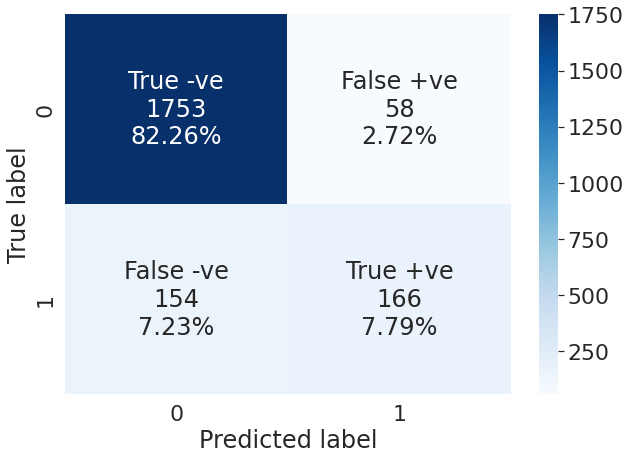

In [69]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [70]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict)
auc_roc

0.7433617476532303

In [71]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7433617476532303

Text(0.5, 0, 'False Positive Rate')

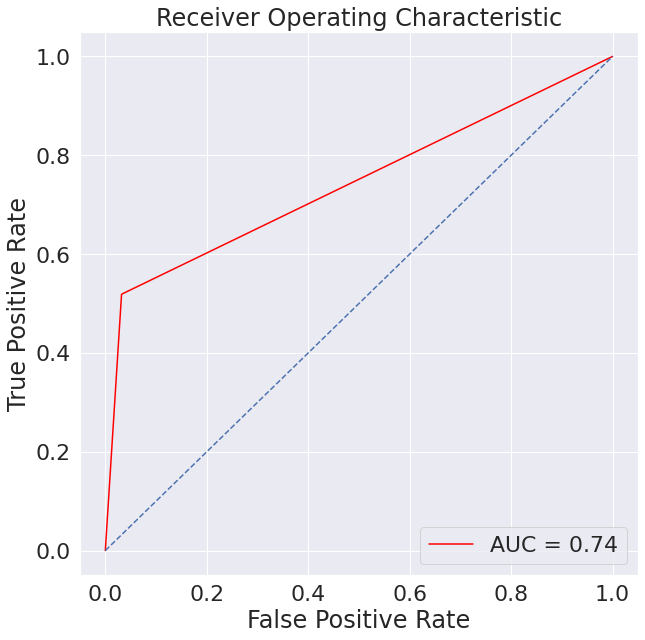

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [73]:
scores(Dt)

Accuracy on training set :  0.9383875132026758
Accuracy on test set :  0.9005161895823557

Recall on training set :  0.64
Recall on test set :  0.51875

Precision on training set :  0.9358830146231721
Precision on test set :  0.7410714285714286

F1 on training set :  0.760164458656921
F1 on test set :  0.6102941176470589


### **Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


RandomForestClassifier(random_state=25)

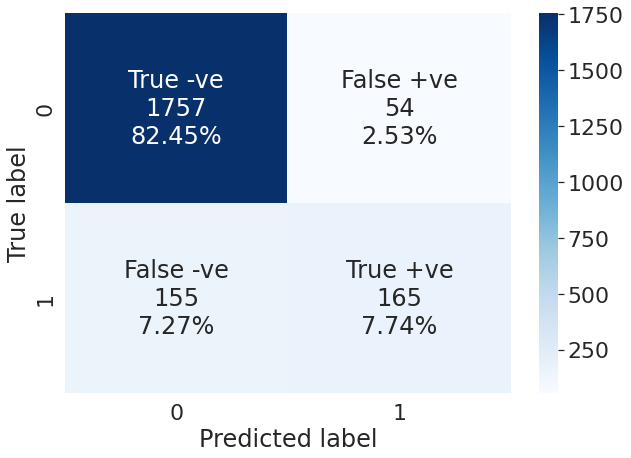

In [76]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [77]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.742903609884042

In [78]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.742903609884042

Text(0.5, 0, 'False Positive Rate')

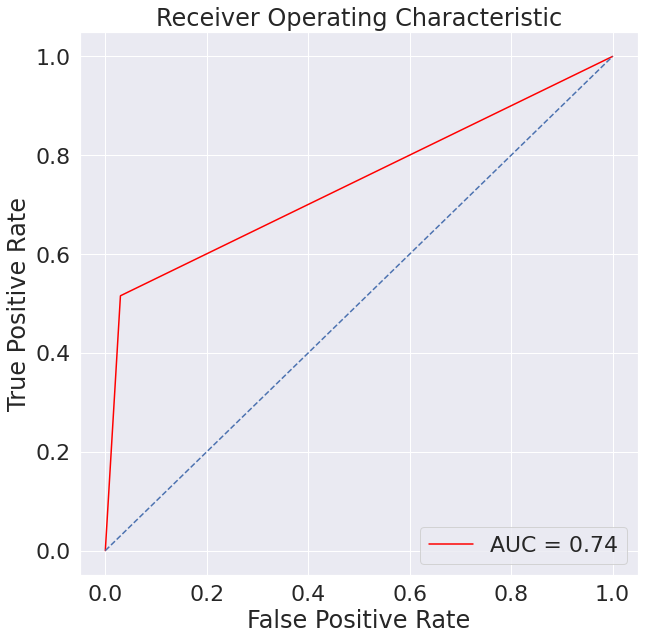

In [79]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [80]:
scores(random_forest)

Accuracy on training set :  0.9383875132026758
Accuracy on test set :  0.9019239793524167

Recall on training set :  0.6684615384615384
Recall on test set :  0.515625

Precision on training set :  0.9023883696780893
Precision on test set :  0.7534246575342466

F1 on training set :  0.7680070702607158
F1 on test set :  0.6122448979591837


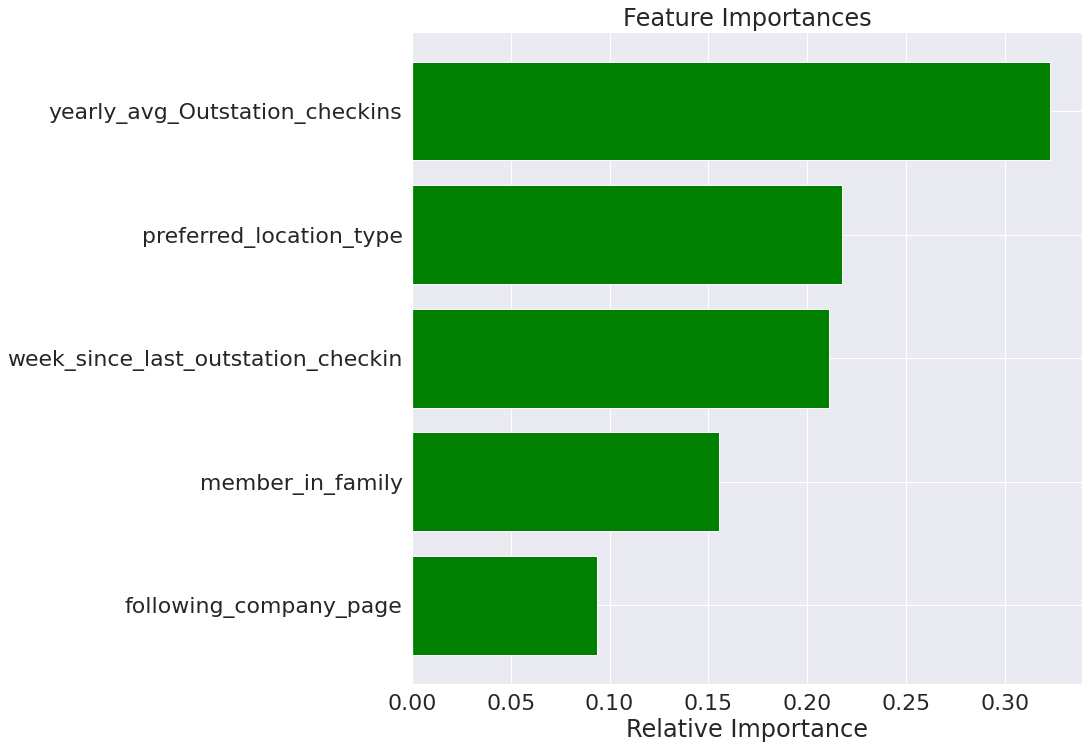

In [81]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [82]:
scores(random_forest) #peformance scores for Random Forest

Accuracy on training set :  0.9383875132026758
Accuracy on test set :  0.9019239793524167

Recall on training set :  0.6684615384615384
Recall on test set :  0.515625

Precision on training set :  0.9023883696780893
Precision on test set :  0.7534246575342466

F1 on training set :  0.7680070702607158
F1 on test set :  0.6122448979591837




**Random Forest Classifier with weights**

In [83]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

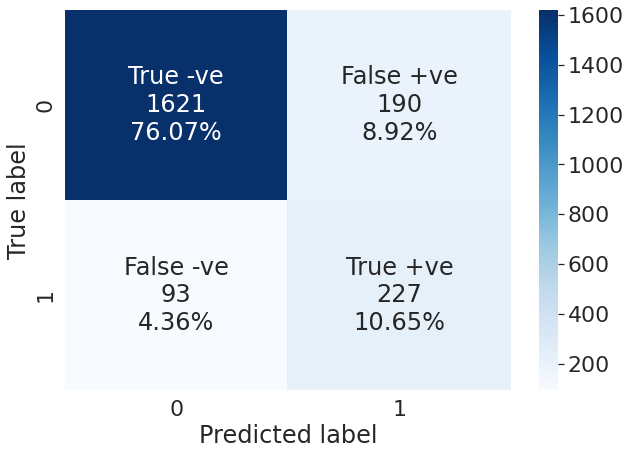

In [84]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [85]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.802230294036444

In [86]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.802230294036444

Text(0.5, 0, 'False Positive Rate')

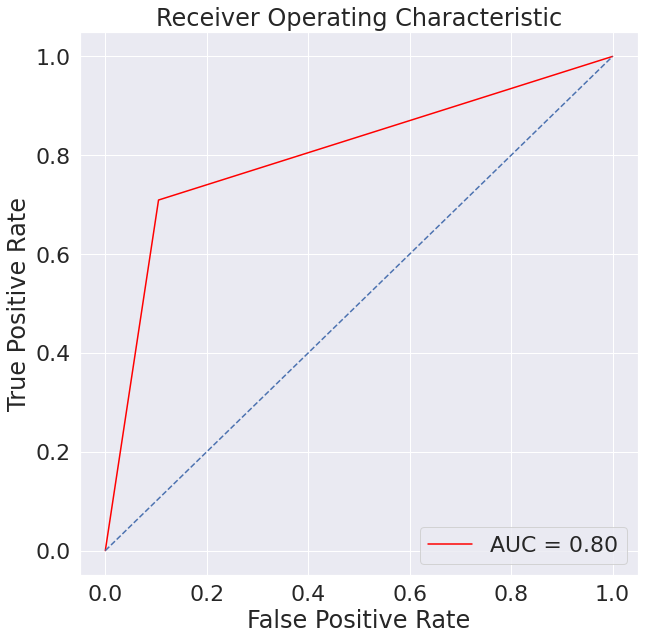

In [87]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [88]:
scores(random_forest_wt)

Accuracy on training set :  0.9045886633024293
Accuracy on test set :  0.8671984983575786

Recall on training set :  0.8984615384615384
Recall on test set :  0.709375

Precision on training set :  0.6316928069226609
Precision on test set :  0.5443645083932853

F1 on training set :  0.7418228008891711
F1 on test set :  0.616010854816825


* There is no improvement in the metrics for the weighted Random Forest classifier.


### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=5, min_samples_leaf=2, random_state=25)

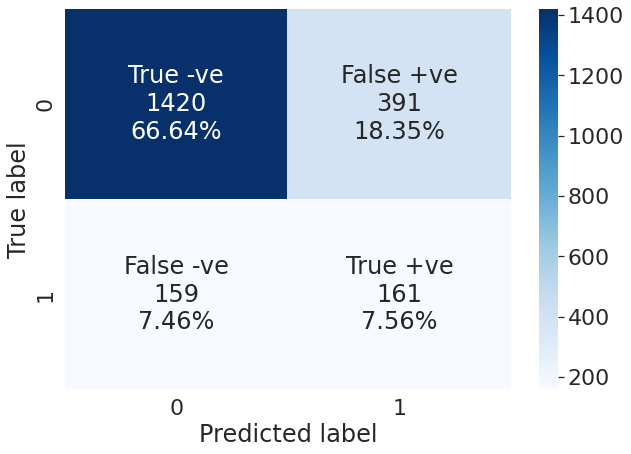

In [91]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [92]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.6436110919381557

In [93]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6436110919381557

Text(0.5, 0, 'False Positive Rate')

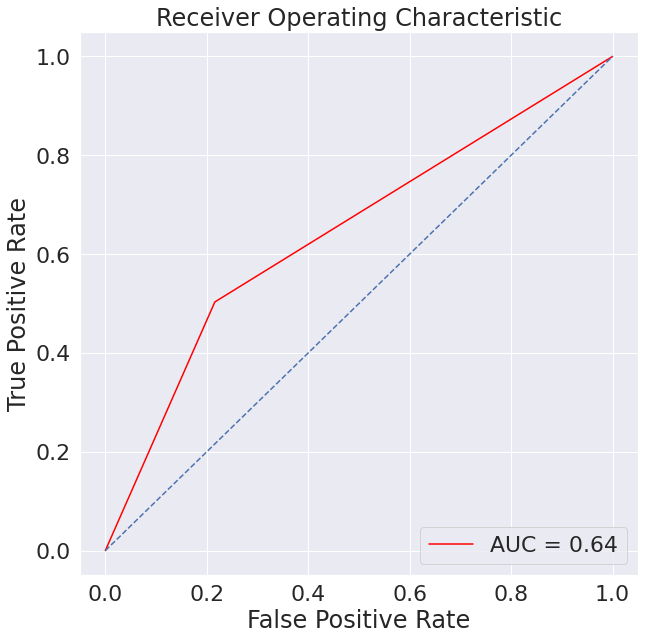

In [94]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [95]:
scores(classifier)

Accuracy on training set :  0.7387630559793451
Accuracy on test set :  0.7419052088221493

Recall on training set :  0.536923076923077
Recall on test set :  0.503125

Precision on training set :  0.3006029285099053
Precision on test set :  0.2916666666666667

F1 on training set :  0.38542241855328546
F1 on test set :  0.3692660550458715


* The F1Score has decreased to 0.38 for Train set and 0.36 for test set. 


In [96]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [97]:
from xgboost import XGBClassifier

In [98]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

XGBClassifier(eval_metric='logloss', random_state=25)

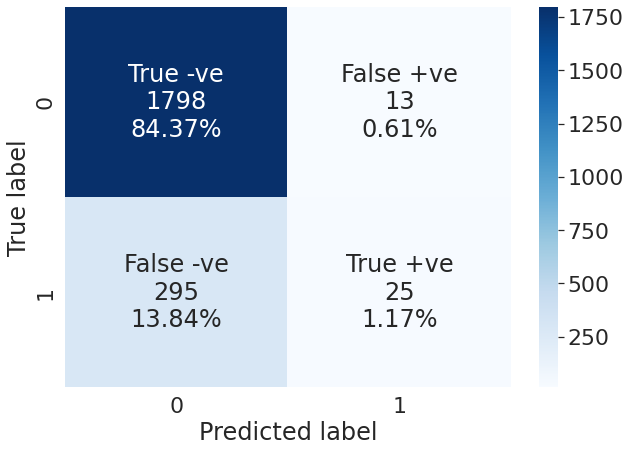

In [99]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [100]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

0.535473322749862

In [101]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.535473322749862

Text(0.5, 0, 'False Positive Rate')

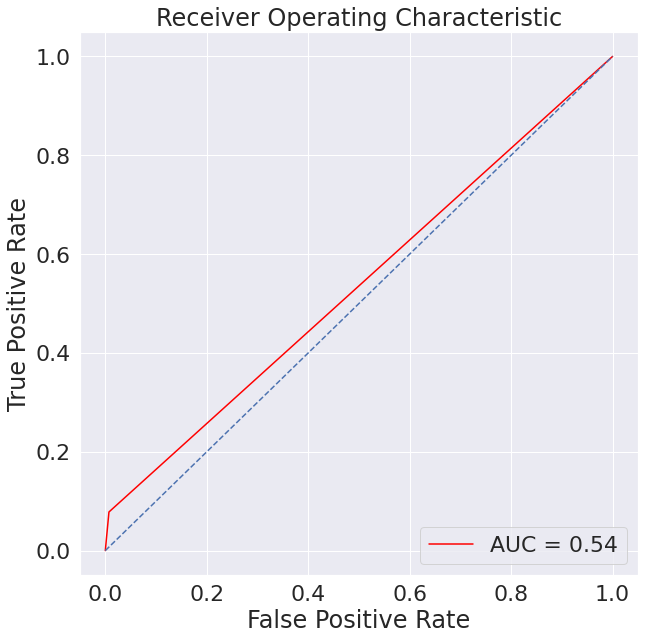

In [102]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [103]:
scores(XG_boost)

Accuracy on training set :  0.8611665297500294
Accuracy on test set :  0.8554669169404036

Recall on training set :  0.1176923076923077
Recall on test set :  0.078125

Precision on training set :  0.8095238095238095
Precision on test set :  0.6578947368421053

F1 on training set :  0.20550705171255876
F1 on test set :  0.13966480446927373





### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [ ]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(xgb_tuned)

* The accuracy and F1score has increased.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(logreg)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


## ADA Boost

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

In [ ]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Ada_boost)

## Gradient Boost Classifier

In [ ]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Grad_boost)

## Gradient Boost with ADABoost classifier

In [ ]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Grad_boost_ada)

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(bagging)

### Hyperparameters for Bagging Classifier

In [ ]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(bagging_estimator_tuned)

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(lda)

## KNN Classifier

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

In [ ]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(knn)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(gnb)

In [ ]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])
  

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

In [ ]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

## **Model training for Laptop.**

In [ ]:
df_laptop.corr()

In [ ]:
df_laptop.drop(['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
         'total_likes_on_outofstation_checkin_received', 'montly_avg_comment_on_company_page',
        'working_flag', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page'],
               inplace=True, axis='columns')

In [ ]:
df_laptop.drop(['preferred_device'],inplace=True, axis='columns')

In [ ]:
df_laptop.shape

#### Train & Test splits.

In [ ]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.2)

In [ ]:
train_laptop.shape

In [ ]:
test_laptop.shape

In [ ]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

In [ ]:
X_train_laptop.head()

In [ ]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

In [ ]:
X_test_laptop.head()

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

In [ ]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Dt)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


In [ ]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(random_forest)




**Random Forest Classifier with weights**

In [ ]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

In [ ]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(random_forest_wt)

* There is little improvement in the metrics for the weighted Random Forest classifier.

## Feature Importance random forest


In [ ]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()





### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


In [ ]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(classifier)

In [ ]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

In [ ]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(XG_boost)




### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [ ]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(xgb_tuned)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(logreg)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


## ADA Boost

In [ ]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Ada_boost)

## Gradient Boost Classifier

In [ ]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Grad_boost)

## Gradient Boost with ADABoost classifier

In [ ]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Grad_boost_ada)

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(bagging)

### Hyperparameters for Bagging Classifier

In [ ]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(bagging_estimator_tuned)

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(lda)

## KNN Classifier

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

In [ ]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(knn)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(gnb)

In [ ]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

In [ ]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

# Train and Splits 70:30 ratio

#### Train & Test splits.

In [ ]:
from sklearn.model_selection import train_test_split

train_mobile, test_mobile = train_test_split(df_mobile, test_size=0.3)

In [ ]:
train_mobile.shape

In [ ]:
test_mobile.shape

In [ ]:
X_train_mobile = train_mobile.drop(['Taken_product'], axis='columns')
y_train_mobile = train_mobile['Taken_product']
y_train_mobile.head()

In [ ]:
X_train_mobile.head()

In [ ]:
X_test_mobile = test_mobile.drop(['Taken_product'], axis='columns')
y_test_mobile = test_mobile['Taken_product']
y_test_mobile.head()

In [ ]:
X_test_mobile.head()

## **Model Building:**
### **Model Evaluation Criterion**
**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

**Metric for Optimization:**
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.


**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

In [ ]:
Dt.fit(X_train_mobile, y_train_mobile) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Dt)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_mobile,y_train_mobile)


In [ ]:
y_predict = random_forest.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(random_forest)

* Random Forest classifier is also overfitting for the training set and the F1 score metric has also reduced.


**Random Forest Classifier with weights**

In [ ]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_mobile,y_train_mobile)

In [ ]:
y_predict = random_forest_wt.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(random_forest_wt)

* There is no improvement in the metrics for the weighted Random Forest classifier.


### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_mobile, y_train_mobile)


In [ ]:
y_predict = classifier.predict(X_test_mobile) 
make_confusion_matrix(y_test_mobile,y_predict) 


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(classifier)

* The F1Score has decreased to 0.38 for Train set and 0.37 for test set. 

In [ ]:
X_train_mobile['yearly_avg_Outstation_checkins'] = X_train_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_train_mobile['member_in_family'] = X_train_mobile['member_in_family'].astype('int')
X_test_mobile['yearly_avg_Outstation_checkins'] = X_test_mobile['yearly_avg_Outstation_checkins'].astype('int')
X_test_mobile['member_in_family'] = X_test_mobile['member_in_family'].astype('int')

Boosting Model:


**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_mobile,y_train_mobile)

In [ ]:
y_predict = XG_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(XG_boost)




### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [ ]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = xgb_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(xgb_tuned)

* The accuracy and F1score has increased.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = logreg.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(logreg)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mobile, y_test_mobile)))


In [ ]:
feature_names = X_train_mobile.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(random_forest) #peformance scores for Random Forest

## ADA Boost

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

In [ ]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_mobile, y_train_mobile)
y_pred = Ada_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_pred)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Ada_boost)

## Gradient Boost Classifier

In [ ]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Grad_boost)

## Gradient Boost with ADABoost classifier

In [ ]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_mobile, y_train_mobile)
y_predict = Grad_boost_ada.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(Grad_boost_ada)

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_mobile, y_train_mobile)
y_predict = bagging.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(bagging)

### Hyperparameters for Bagging Classifier

In [ ]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_mobile, y_train_mobile)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = bagging_estimator_tuned.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(bagging_estimator_tuned)

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mobile, y_train_mobile)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
y_predict = lda.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(lda)

## KNN Classifier

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_mobile, y_train_mobile)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_mobile, y_test_mobile) 


In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Fit the model
knn.fit(X_train_mobile,y_train_mobile)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_mobile,y_test_mobile)

In [ ]:
y_predict = knn.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(knn)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_mobile, y_train_mobile)

In [ ]:
y_predict = gnb.predict(X_test_mobile)
make_confusion_matrix(y_test_mobile, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_mobile,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mobile, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores(gnb)

In [ ]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

In [ ]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

## **Model training for Laptop.**

In [ ]:
df_laptop.corr()

In [ ]:
df_laptop.shape

#### Train & Test splits.

In [ ]:
train_laptop, test_laptop = train_test_split(df_laptop, test_size=0.3)

In [ ]:
train_laptop.shape

In [ ]:
test_laptop.shape

In [ ]:
X_train_laptop = train_laptop.drop(['Taken_product'], axis='columns')
y_train_laptop = train_laptop['Taken_product']
y_train_laptop.head()

In [ ]:
X_train_laptop.head()

In [ ]:
X_test_laptop = test_laptop.drop(['Taken_product'], axis='columns')
y_test_laptop = test_laptop['Taken_product']
y_test_laptop.head()

In [ ]:
X_test_laptop.head()

**Building the Model:**
* We will start with a Decision Tree model
* Next, we will build one ensemble model - Random Forest Classifier
* Then, we will build one Boosting ensemble models - XG Boost
* Then, we will build one statistical model - Logistic Regression
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest.
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.




### **Decision Tree**

We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

In [ ]:
Dt.fit(X_train_laptop, y_train_laptop) #fit the train set to Decision tree
y_predict = Dt.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Dt)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train_laptop,y_train_laptop)


In [ ]:
y_predict = random_forest.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(random_forest)




**Random Forest Classifier with weights**

In [ ]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train_laptop,y_train_laptop)

In [ ]:
y_predict = random_forest_wt.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(random_forest_wt)

* There is little improvement in the metrics for the weighted Random Forest classifier.


## Feature Importance of Random Forest

In [ ]:
feature_names = X_train_laptop.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




### **GridSearch for Hyperparameter Tuning of the models:**
* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparameters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid


**Hyperparameters for Decision Tree Model**



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train_laptop, y_train_laptop)


In [ ]:
y_predict = classifier.predict(X_test_laptop) 
make_confusion_matrix(y_test_laptop,y_predict) 


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(classifier)

In [ ]:
X_train_laptop['yearly_avg_Outstation_checkins'] = X_train_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_train_laptop['member_in_family'] = X_train_laptop['member_in_family'].astype('int')
X_test_laptop['yearly_avg_Outstation_checkins'] = X_test_laptop['yearly_avg_Outstation_checkins'].astype('int')
X_test_laptop['member_in_family'] = X_test_laptop['member_in_family'].astype('int')

## Boosting Model:


**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train_laptop,y_train_laptop)

In [ ]:
y_predict = XG_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(XG_boost)




### GridSearch for Hyperparameter Tuning of the Boosting model:

Hyperparameters for XGBoost

In [ ]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = xgb_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)


In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(xgb_tuned)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = logreg.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(logreg)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_laptop, y_test_laptop)))


## ADA Boost

In [ ]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train_laptop, y_train_laptop)
y_pred = Ada_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_pred)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Ada_boost)

## Gradient Boost Classifier

In [ ]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Grad_boost)

## Gradient Boost with ADABoost classifier

In [ ]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train_laptop, y_train_laptop)
y_predict = Grad_boost_ada.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop,y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(Grad_boost_ada)

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train_laptop, y_train_laptop)
y_predict = bagging.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(bagging)

### Hyperparameters for Bagging Classifier

In [ ]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25, bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_laptop, y_train_laptop)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = bagging_estimator_tuned.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(bagging_estimator_tuned)

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_laptop, y_train_laptop)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
y_predict = lda.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(lda)

## KNN Classifier

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_laptop, y_train_laptop)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_laptop, y_test_laptop) 


In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Fit the model
knn.fit(X_train_laptop,y_train_laptop)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test_laptop,y_test_laptop)

In [ ]:
y_predict = knn.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(knn)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_laptop, y_train_laptop)

In [ ]:
y_predict = gnb.predict(X_test_laptop)
make_confusion_matrix(y_test_laptop, y_predict)

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_laptop,y_predict) #auc-roc score
auc_roc

In [ ]:
#roc-auc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_laptop, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#plotting roc-auc curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
scores_l(gnb)

In [ ]:
# defining list of models
all_models = [Dt,classifier,random_forest,XG_boost,xgb_tuned, logreg, Ada_boost,Grad_boost, Grad_boost_ada, bagging, bagging_estimator_tuned, lda, knn, gnb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','XGBoost Classifier','Tuned XGBoost Classifier','Logistic Regression','Ada boost','Gradient boost','Gradient and Ada Boost','Bagging','Bagging estimator tuned','Linear Discrimant Analysis', 'KNN','Naive Bayes Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

In [ ]:
#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)